# MLP on the MNIST Data Set - 02/27/18
In this notebook our group trained a series of multi-layer perceptrons to classify digits from the MNIST data set. The code was largely taken from the textbook.
<br><br>
Our group consisted of Zach, Ruobing, Hieu, Keven, and Prateek.

In [3]:
import numpy as np
import cPickle
import gzip
import mlp
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
%matplotlib inline

### Experiment One
In the first experiment we trained 7 different mlp's with 1, 2, 5, 10, 20, 30, and 40 hidden nodes. The test consisted of 1000 images with a 0.1 learning rate. After several trials, the mlp with 20 hidden nodes had on average the best performance by a very thin margin. The example below shows the 20 hidden layer mlp achieving a 81.399% success rate.
<br><br>
The confusion matrix is illustrated below.

In [146]:
nread = 1000
# Just use the first few images
train_in = tset[0][:nread,:]

# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((nread,10))
for i in range(nread):
    train_tgt[i,tset[1][i]] = 1

test_in = teset[0][:nread,:]
test_tgt = np.zeros((nread,10))
for i in range(nread):
    test_tgt[i,teset[1][i]] = 1

# We will need the validation set
valid_in = vset[0][:nread,:]
valid_tgt = np.zeros((nread,10))
for i in range(nread):
    valid_tgt[i,vset[1][i]] = 1

for i in [1,2,5,10,20,30,40]:  
    print "----- "+str(i)  
    net = mlp.mlp(train_in,train_tgt,i,outtype='softmax')
    net.earlystopping(train_in,train_tgt,valid_in,valid_tgt,0.1)
    net.confmat(test_in,test_tgt)


----- 1
1
Iteration:  0  Error:  464.8647405584385
2
Iteration:  0  Error:  436.96456881000626
3
Iteration:  0  Error:  428.16731740287406
4
Iteration:  0  Error:  420.50953165088333
5
Iteration:  0  Error:  413.74299134055707
6
Iteration:  0  Error:  408.4644021718898
7
Iteration:  0  Error:  404.6542640033497
8
Iteration:  0  Error:  401.86718361376256
9
Iteration:  0  Error:  399.6913099570828
10
Iteration:  0  Error:  397.8669175516062
11
Iteration:  0  Error:  396.2549415081702
12
Iteration:  0  Error:  394.78558822593317
13
Iteration:  0  Error:  393.42191304254607
14
Iteration:  0  Error:  392.1396539069411
15
Iteration:  0  Error:  390.9205443072188
16
Iteration:  0  Error:  389.75102061286077
17
Iteration:  0  Error:  388.6215805552182
18
Iteration:  0  Error:  387.52601266521805
19
Iteration:  0  Error:  386.4603945637606
20
Iteration:  0  Error:  385.421973402083
21
Iteration:  0  Error:  384.40843847754013
22
Iteration:  0  Error:  383.41776538763077
23
Iteration:  0  Error

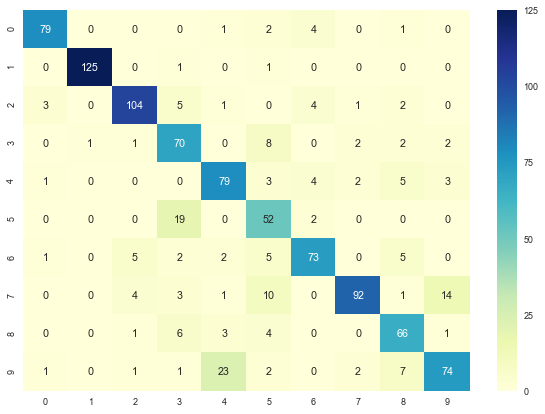

In [27]:
conf_twenty = [[ 79.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,   1.,   0.],
 [  0., 125.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.],
 [  3.,   0., 104.,   5.,   1.,   0.,   4.,   1.,   2.,   0.],
 [  0.,   1.,   1.,  70.,   0.,   8.,   0.,   2.,   2.,   2.],
 [  1.,   0.,   0.,   0.,  79.,   3.,   4.,   2.,   5.,   3.],
 [  0.,   0.,   0.,  19.,   0.,  52.,   2.,   0.,   0.,   0.],
 [  1.,   0.,   5.,   2.,   2.,   5.,  73.,   0.,   5.,   0.],
 [  0.,   0.,   4.,   3.,   1.,  10.,   0.,  92.,   1.,  14.],
 [  0.,   0.,   1.,   6.,   3.,   4.,   0.,   0.,  66.,   1.],
 [  1.,   0.,   1.,   1.,  23.,   2.,   0.,   2.,   7.,  74.]]
confusion = [[int(i) for i in j]for j in conf_twenty]

sn.set(font_scale=.9)
plt.figure(figsize = (10,7))
sn.heatmap(confusion, annot=True, cmap='YlGnBu', fmt='g');


### Experiment Two
Here we used the top performing mlp on the full MNIST data set consisting of
50000 images. We used 10000 images for testing and 10000 images for validation.
Three trials were ran with a learning rate of 0.5.
<br>
All three trials were relatively uniform in their outcomes. We achieved 93.65%, 94.07%, and 93.91% success rates. 

In [57]:
# Read the dataset in (code from sheet)
f = gzip.open('./mnist.pkl.gz', 'rb')
tset, vset, teset = cPickle.load(f)
f.close()


In [58]:
nread = 50000
# Just use the first few images
train_in = tset[0][:nread, :]

In [59]:
# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((nread, 10))
for i in range(nread):
    train_tgt[i, tset[1][i]] = 1

In [60]:
test_and_validation = 10000

In [61]:
test_in = teset[0][:nread, :]
test_tgt = np.zeros((test_and_validation, 10))
for i in range(test_and_validation):
    test_tgt[i, teset[1][i]] = 1

In [62]:
# We will need the validation set
valid_in = vset[0][:nread, :]
valid_tgt = np.zeros((test_and_validation, 10))
for i in range(test_and_validation):
    valid_tgt[i, vset[1][i]] = 1

In [63]:
for i in [20]:
    print "----- "+str(i)
    net = mlp.mlp(train_in, train_tgt, i, outtype='softmax')
    net.earlystopping(train_in, train_tgt, valid_in, valid_tgt, 0.5)
    net.confmat(test_in, test_tgt)


----- 20
1
Iteration:  0  Error:  22588.151371350326
2
Iteration:  0  Error:  10522.163790746043
3
Iteration:  0  Error:  6869.276235314458
4
Iteration:  0  Error:  5009.278514986834
5
Iteration:  0  Error:  4254.687705291881
6
Iteration:  0  Error:  3821.444793578956
7
Iteration:  0  Error:  3556.509547846313
8
Iteration:  0  Error:  3366.7306454949976
9
Iteration:  0  Error:  3220.930893882272
10
Iteration:  0  Error:  3104.14458139381
11
Iteration:  0  Error:  3007.3388988776546
12
Iteration:  0  Error:  2924.674351304651
13
Iteration:  0  Error:  2852.836599713563
14
Iteration:  0  Error:  2789.8354522609675
15
Iteration:  0  Error:  2734.633717061845
16
Iteration:  0  Error:  2686.6540497611068
17
Iteration:  0  Error:  2644.569262796524
18
Iteration:  0  Error:  2606.6745364564745
19
Iteration:  0  Error:  2571.8352724553706
20
Iteration:  0  Error:  2539.336361216939
21
Iteration:  0  Error:  2509.6406335469446
22
Iteration:  0  Error:  2481.104262929224
23
Iteration:  0  Error:

In [66]:
# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((nread, 10))
for i in range(nread):
    train_tgt[i, tset[1][i]] = 1

In [67]:
test_and_validation = 10000

In [68]:
test_in = teset[0][:nread, :]
test_tgt = np.zeros((test_and_validation, 10))
for i in range(test_and_validation):
    test_tgt[i, teset[1][i]] = 1

In [69]:
# We will need the validation set
valid_in = vset[0][:nread, :]
valid_tgt = np.zeros((test_and_validation, 10))
for i in range(test_and_validation):
    valid_tgt[i, vset[1][i]] = 1

In [70]:
for i in [20]:
    print "----- "+str(i)
    net = mlp.mlp(train_in, train_tgt, i, outtype='softmax')
    net.earlystopping(train_in, train_tgt, valid_in, valid_tgt, 0.5)
    net.confmat(test_in, test_tgt)

----- 20
1
Iteration:  0  Error:  22918.402782609333
2
Iteration:  0  Error:  9739.450172351157
3
Iteration:  0  Error:  6772.723165441328
4
Iteration:  0  Error:  5111.467436160509
5
Iteration:  0  Error:  4173.584412672176
6
Iteration:  0  Error:  3818.352733179563
7
Iteration:  0  Error:  3587.8253848172385
8
Iteration:  0  Error:  3414.1898793746013
9
Iteration:  0  Error:  3269.635440981335
10
Iteration:  0  Error:  3150.2221968344916
11
Iteration:  0  Error:  3050.3959241598327
12
Iteration:  0  Error:  2959.0170777224544
13
Iteration:  0  Error:  2870.811818600397
14
Iteration:  0  Error:  2788.3144650794634
15
Iteration:  0  Error:  2713.217491594588
16
Iteration:  0  Error:  2645.903144860509
17
Iteration:  0  Error:  2585.5889302780347
18
Iteration:  0  Error:  2531.156565993348
19
Iteration:  0  Error:  2481.6699545362344
20
Iteration:  0  Error:  2436.4267678030174
21
Iteration:  0  Error:  2394.8856385813215
22
Iteration:  0  Error:  2356.571481237612
23
Iteration:  0  Err

In [71]:
# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((nread, 10))
for i in range(nread):
    train_tgt[i, tset[1][i]] = 1

In [72]:
test_and_validation = 10000

In [73]:
test_in = teset[0][:nread, :]
test_tgt = np.zeros((test_and_validation, 10))
for i in range(test_and_validation):
    test_tgt[i, teset[1][i]] = 1

In [74]:
# We will need the validation set
valid_in = vset[0][:nread, :]
valid_tgt = np.zeros((test_and_validation, 10))
for i in range(test_and_validation):
    valid_tgt[i, vset[1][i]] = 1

In [75]:
for i in [20]:
    print "----- "+str(i)
    net = mlp.mlp(train_in, train_tgt, i, outtype='softmax')
    net.earlystopping(train_in, train_tgt, valid_in, valid_tgt, 0.5)
    net.confmat(test_in, test_tgt)

----- 20
1
Iteration:  0  Error:  22678.492476181178
2
Iteration:  0  Error:  9609.570949591414
3
Iteration:  0  Error:  6747.895322648533
4
Iteration:  0  Error:  5914.185675709727
5
Iteration:  0  Error:  4251.472686948113
6
Iteration:  0  Error:  3772.839213041023
7
Iteration:  0  Error:  3493.8228478059546
8
Iteration:  0  Error:  3303.0491084492214
9
Iteration:  0  Error:  3167.79972400889
10
Iteration:  0  Error:  3062.8544592204507
11
Iteration:  0  Error:  2977.0446405734574
12
Iteration:  0  Error:  2904.9952785771743
13
Iteration:  0  Error:  2842.7388838232127
14
Iteration:  0  Error:  2786.3125817251207
15
Iteration:  0  Error:  2733.436012632662
16
Iteration:  0  Error:  2682.805315390502
17
Iteration:  0  Error:  2633.731338445127
18
Iteration:  0  Error:  2586.2641087509037
19
Iteration:  0  Error:  2540.82983125658
20
Iteration:  0  Error:  2497.568313326391
21
Iteration:  0  Error:  2456.4449543538008
22
Iteration:  0  Error:  2417.8597256034595
23
Iteration:  0  Error

### Results
Below we graphed the confusion matrix of the top performing result from experiment two as well as the different error rates from each iteration of training.

In [23]:
conf_map_three = [[int(i) for i in j] for j in [[9.610e+02, 0.000e+00, 1.300e+01, 2.000e+00, 1.000e+00, 6.000e+00, 9.000e+00, 2.000e+00, 5.000e+00, 1.200e+01],
 [0.000e+00, 1.117e+03, 2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 3.000e+00,4.000e+00, 4.000e+00, 4.000e+00],
 [1.000e+00, 3.000e+00, 9.410e+02, 9.000e+00, 4.000e+00, 7.000e+00, 4.000e+00,1.700e+01, 8.000e+00, 1.000e+00],
 [2.000e+00, 3.000e+00, 1.000e+01, 9.330e+02, 0.000e+00, 2.600e+01, 0.000e+00,4.000e+00, 1.400e+01, 1.000e+01],
 [1.000e+00, 0.000e+00, 8.000e+00, 1.000e+00, 9.330e+02, 5.000e+00, 7.000e+00,6.000e+00, 9.000e+00, 2.300e+01],
 [8.000e+00, 5.000e+00, 7.000e+00, 3.400e+01, 0.000e+00, 7.960e+02, 1.000e+01,2.000e+00, 1.600e+01, 5.000e+00],
 [3.000e+00, 1.000e+00, 1.100e+01, 1.000e+00, 1.300e+01, 1.300e+01, 9.190e+02,0.000e+00, 9.000e+00, 0.000e+00],
 [2.000e+00, 2.000e+00, 1.300e+01, 1.200e+01, 1.000e+00, 6.000e+00, 2.000e+00,9.710e+02, 1.100e+01, 1.300e+01],
 [2.000e+00, 3.000e+00, 1.900e+01, 1.300e+01, 6.000e+00, 2.200e+01, 4.000e+00,6.000e+00, 8.920e+02, 1.300e+01],
 [0.000e+00, 1.000e+00, 8.000e+00, 4.000e+00, 2.400e+01, 8.000e+00, 0.000e+00,1.600e+01, 6.000e+00, 9.280e+02]]]


In [24]:
map_three = pd.DataFrame(conf_map_three, index =[i for i in range(10)],columns = [i for i in range(10)])

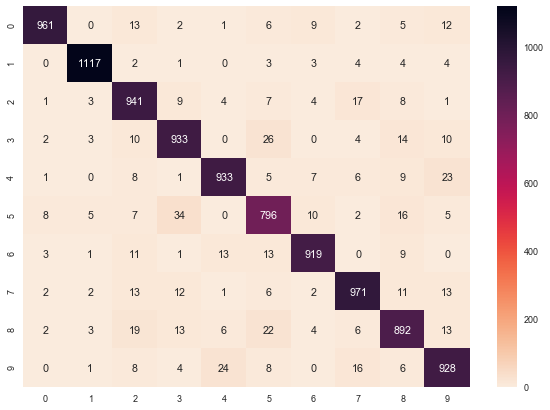

In [26]:
colormap = sn.cm.rocket_r
sn.set(font_scale=.9)
plt.figure(figsize = (10,7))
sn.heatmap(map_three, annot=True, cmap=colormap, fmt='g');

In [104]:
error_one = [22588.151371350326,
  10522.163790746043,
  6869.276235314458,
  5009.278514986834,
  4254.687705291881,
  3821.444793578956,
  3556.509547846313,
  3366.7306454949976,
  3220.930893882272,
  3104.14458139381,
  3007.3388988776546,
  2924.674351304651,
  2852.836599713563,
  2789.8354522609675,
  2734.633717061845,
  2686.6540497611068,
  2644.569262796524,
  2606.6745364564745,
  2571.8352724553706,
  2539.336361216939,
  2509.6406335469446,
  2481.104262929224,
  2453.4700931954567,
  2427.320565641134,
  2402.7757648682386,
  2379.6381277085957,
  2357.584606176279,
  2336.3416602418843,
  2315.7483971606584,
  2295.811024832043,
  2276.63769334513,
  2258.2706400164475,
  2240.6412773076554,
  2223.783122475121,
  2207.8353360240844,
  2192.8533435041277,
  2178.806452604347,
  2165.6258314160054,
  2153.2435873694876,
  2141.623365580112,
  2130.750405338376,
  2120.57402682572,
  2110.970864128141,
  2101.805376379773,
  2093.0071080409407,
  2084.5701386990117,
  2076.505368833304,
  2068.83042370836,
  2061.5871279079347,
  2054.827291869142,
  2048.564514933668,
  2042.7661468511983]

In [105]:
error_two = [22918.402782609333,
  9739.450172351157,
  6772.723165441328,
  5111.467436160509,
  4173.584412672176,
  3818.352733179563,
  3587.8253848172385,
  3414.1898793746013,
  3269.635440981335,
  3150.2221968344916,
  3050.3959241598327,
  2959.0170777224544,
  2870.811818600397,
  2788.3144650794634,
  2713.217491594588,
  2645.903144860509,
  2585.5889302780347,
  2531.156565993348,
  2481.6699545362344,
  2436.4267678030174,
  2394.8856385813215,
  2356.571481237612,
  2321.0006521718865,
  2287.823037875903,
  2256.8438447049284,
  2227.90881300458,
  2200.91859463422,
  2175.7072510486632,
  2152.033607446964,
  2129.5926938505813,
  2108.1928076110935,
  2087.8050707307398,
  2068.4515189944514,
  2050.1177985503145,
  2032.7220709091932,
  2016.1236057632914,
  2000.1683239545628,
  1984.739359267941,
  1969.7674045533684,
  1955.218983919552,
  1941.082167349439,
  1927.3537624162152,
  1914.03129502591,
  1901.109991713341,
  1888.5823444709692,
  1876.4377348435546,
  1864.6608810271919,
  1853.2296349652045,
  1842.1142757041198,
  1831.2801766754899,
  1820.6933063576225,
  1810.3262252644201,
  1800.1626495420303,
  1790.1998016660973,
  1780.4483529235506,
  1770.9303599691525,
  1761.6758377477863,
  1752.7169146342676,
  1744.0793060053843,
  1735.7763343834665,
  1727.8094410219423,
  1720.1717511209883,
  1712.850461291359,
  1705.82783855916,
  1699.0821415345224,
  1692.5887046658515]

In [106]:
error_three = [22678.492476181178,
  9609.570949591414,
  6747.895322648533,
  5914.185675709727,
  4251.472686948113,
  3772.839213041023,
  3493.8228478059546,
  3303.0491084492214,
  3167.79972400889,
  3062.8544592204507,
  2977.0446405734574,
  2904.9952785771743,
  2842.7388838232127,
  2786.3125817251207,
  2733.436012632662,
  2682.805315390502,
  2633.731338445127,
  2586.2641087509037,
  2540.82983125658,
  2497.568313326391,
  2456.4449543538008,
  2417.8597256034595,
  2382.1649568063212,
  2349.3119717236873,
  2319.104422157252,
  2291.3315052441963,
  2265.7552652461745,
  2242.1884639271348,
  2220.405128748659,
  2200.1127009903394,
  2181.0960177619845,
  2163.2622651585234,
  2146.564682672882,
  2130.928408282718,
  2116.2332426130242,
  2102.362415203265,
  2089.2119165761,
  2076.6756550565938,
  2064.638335678729,
  2052.9344929757067,
  2041.399397058523,
  2030.0717060308077,
  2019.1954797228057,
  2008.99571009981,
  1999.5481813891668,
  1990.8172970158546]

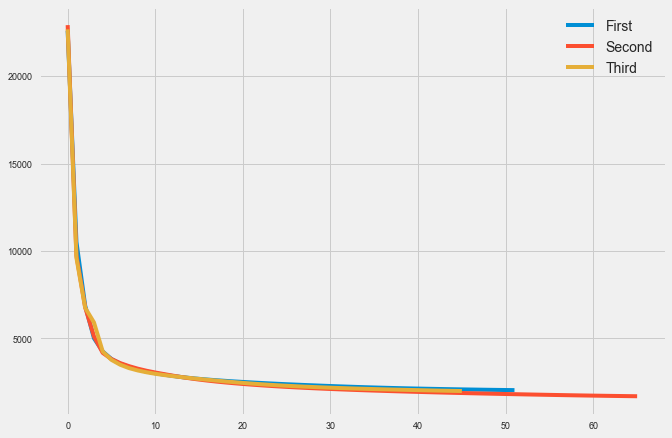

In [149]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
plt.plot(error_one)
plt.plot(error_two)
plt.plot(error_three)
plt.legend(['First', 'Second', 'Third'], loc='upper right',prop={'size': 14});

### Results - Continued
It would appear from the error chart that largest indicator of success is the "early stoppage." The three trials were essentially identical until the first and second trial stopped. The second trial went through more iterations and yielded a lower final error rate.